Minimum of -896.457 occurs at -15.165


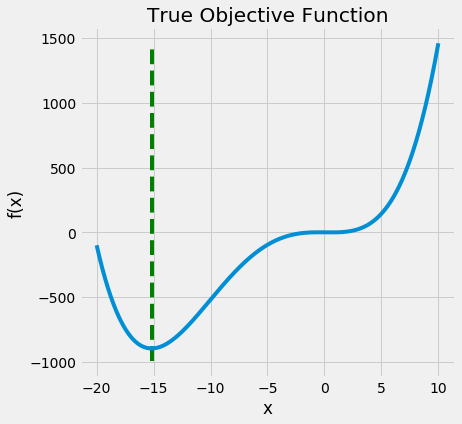

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def true_objective(x):
    """True Objective function to minimize"""
    
    # Create the polynomial object
    function = np.poly1d([1, 20, -6, -20, 10])

    # output of the function
    return function(x) * 0.05

# function is evaluated between -20 and 10
x = np.linspace(-20, 10, 1000)
y = true_objective(x)

miny = min(y)
minx = x[np.argmin(y)]

# Function Visualization
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,6))
plt.title('True Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 100, max(y), linestyles = '--', colors = 'g')
plt.plot(x, y);

# Minimum function at value
print('Minimum of %0.3f occurs at %0.3f' % (miny, minx))

In [2]:
%matplotlib inline

In [4]:
from hyperopt import hp

# Creating domain space
domain_space = hp.uniform('x', -20, 10)

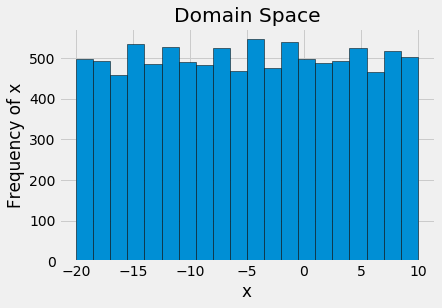

In [5]:
from hyperopt.pyll.stochastic import sample


instances = []

# Sample 10000 values from the range
for x in range(10000):
    instances.append(sample(domain_space))
    

# Histogram of the values
plt.hist(instances, bins = 20, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency of x'); plt.title('Domain Space');


In [6]:
from hyperopt import rand, tpe

# initializing approaches
bayesian_tpe = tpe.suggest
random_search = rand.suggest

In [7]:
from hyperopt import Trials

# Creating trials 
tpe_trials = Trials()
rand_trials = Trials()

In [8]:
from hyperopt import fmin

# Run bayesian optimization with tpe search with 2000 evals
tpe_min = fmin(fn=true_objective, space=domain_space, algo=bayesian_tpe, trials=tpe_trials, 
                max_evals=2000, rstate= np.random.RandomState(50))

print(tpe_min)

# Run random search with 2000 evals
rand_min = fmin(fn=true_objective, space=domain_space, algo=random_search, trials=rand_trials, 
                 max_evals=2000, rstate= np.random.RandomState(50))

print(rand_min)

100%|██████████| 2000/2000 [00:10<00:00, 186.96it/s, best loss: -896.4592561606569]
{'x': -15.17365167259258}
100%|██████████| 2000/2000 [00:01<00:00, 1004.91it/s, best loss: -896.4593723699498]
{'x': -15.17535178395335}


In [9]:
# INFO about loss
print('Minimum loss attained with TPE:    {:.3f}'.format(tpe_trials.best_trial['result']['loss']))
print('Minimum loss attained with random: {:.3f}'.format(rand_trials.best_trial['result']['loss']))
print('Actual minimum of f(x):            {:.3f}'.format(miny))

# info about total no of trails
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['x'][0]))
print('Number of trials needed to attain minimum with random: {}'.format(rand_trials.best_trial['misc']['idxs']['x'][0]))

# info about x
print('\nBest value of x from TPE:    {:.3f}'.format(tpe_min['x']))
print('Best value of x from random: {:.3f}'.format(rand_min['x']))
print('Actual best value of x:      {:.3f}'.format(minx))

Minimum loss attained with TPE:    -896.459
Minimum loss attained with random: -896.459
Actual minimum of f(x):            -896.457

Number of trials needed to attain minimum with TPE:    1135
Number of trials needed to attain minimum with random: 241

Best value of x from TPE:    -15.174
Best value of x from random: -15.175
Actual best value of x:      -15.165


In [10]:
%%timeit -n 3
# Running tpe algorithm with 200 evals
tpe_best = fmin(fn=true_objective, space=domain_space, algo=bayesian_tpe, max_evals=200)

100%|██████████| 200/200 [00:00<00:00, 541.84it/s, best loss: -896.4590928530979]
362 ms ± 6.45 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [11]:
%%timeit -n 3

# Running random search with 200 evals
random_best = fmin(fn=true_objective, space=domain_space, algo=random_search, max_evals=200)

100%|██████████| 200/200 [00:00<00:00, 2327.28it/s, best loss: -896.4557607556443]
81.5 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [12]:
res_tpe = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results], 'iteration': tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x']})
                            


In [15]:
res_tpe['rolling_average_x'] = res_tpe['x'].rolling(50).mean().fillna(method = 'bfill')
res_tpe['rolling_average_loss'] = res_tpe['loss'].rolling(50).mean().fillna(method = 'bfill')


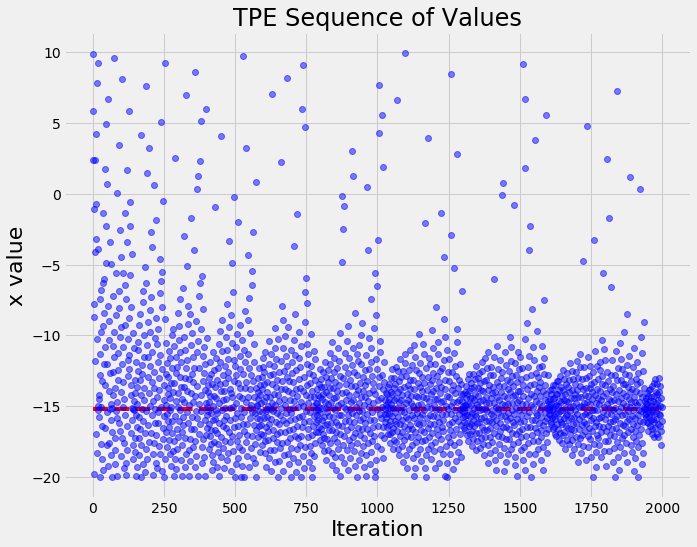

In [18]:
plt.figure(figsize = (10, 8))
plt.plot(res_tpe['iteration'], res_tpe['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('TPE Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

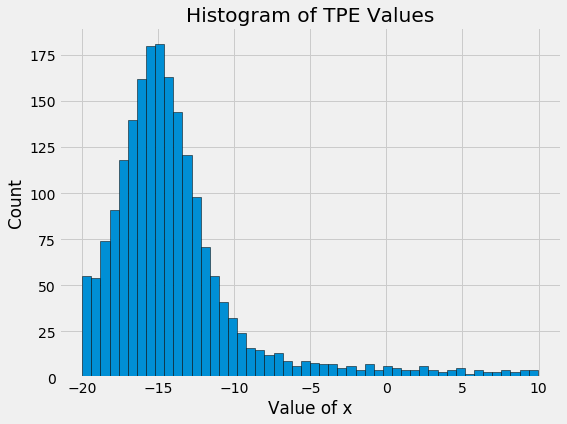

In [20]:
plt.figure(figsize = (8, 6))
plt.hist(res_tpe['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

Best Loss of -896.459 occured at iteration 1135


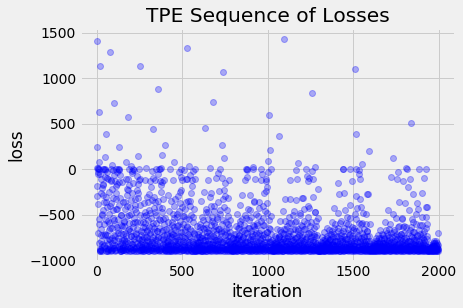

In [23]:
# Sort in descending loss order
tpe_results = res_tpe.sort_values('loss', ascending = True).reset_index()

plt.plot(tpe_results['iteration'], tpe_results['loss'], 'bo', alpha = 0.3);
plt.xlabel('iteration'); plt.ylabel('loss'); plt.title('TPE Sequence of Losses');

print('Best Loss of {:.3f} occured at iteration {}'.format(tpe_results['loss'][0], tpe_results['iteration'][0]))

In [33]:
res_rand = pd.DataFrame({'loss': [x['loss'] for x in rand_trials.results], 'iteration': rand_trials.idxs_vals[0]['x'],
                            'x': rand_trials.idxs_vals[1]['x']})
                            
res_rand.head()

,loss,iteration,x
0,1404.657658,0,9.885141
1,240.347929,1,5.829687
2,12.127215,2,2.415354
3,-296.742630,3,-7.770524
4,-184.696936,4,-19.773179


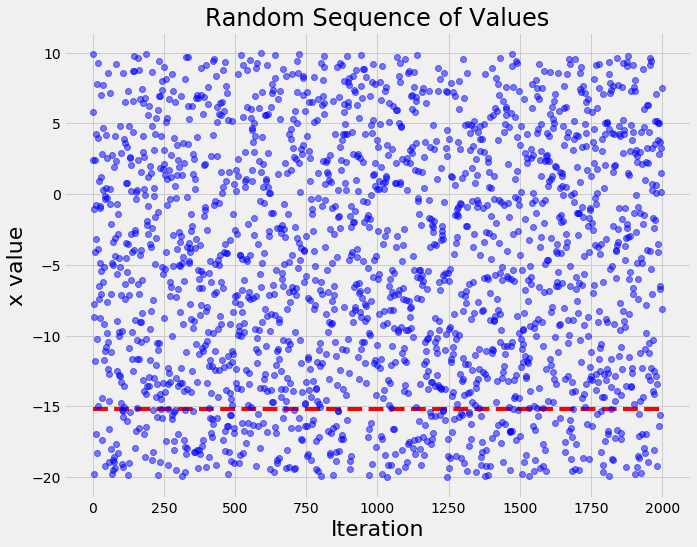

In [34]:
plt.figure(figsize = (10, 8))
plt.plot(res_rand['iteration'], res_rand['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('Random Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

Best Loss of -896.459 occured at iteration 241


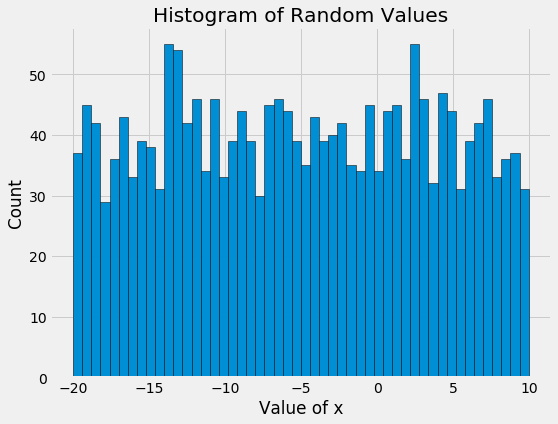

In [35]:
res_rand = res_rand.sort_values('loss', ascending = True).reset_index()

plt.figure(figsize = (8, 6))
plt.hist(res_rand['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of Random Values'); plt.xlabel('Value of x'); plt.ylabel('Count');


print('Best Loss of {:.3f} occured at iteration {}'.format(res_rand['loss'][0], res_rand['iteration'][0]))